In [6]:
import math
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt

In [87]:
LR = 0.02
EPOCH = 150


In [79]:
steps = torch.linspace(0, math.pi * 2, 100)
x = torch.sin(steps)
y = torch.cos(steps)

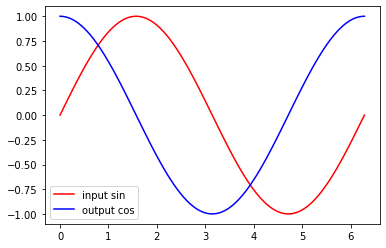

In [80]:
plt.plot(steps, x, '-r', label="input sin")
plt.plot(steps, y, '-b', label="output cos")
plt.legend(loc="best")
plt.show()

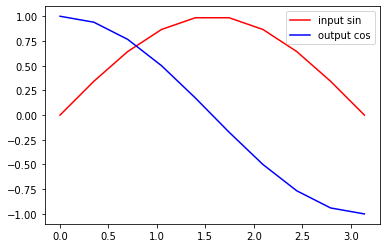

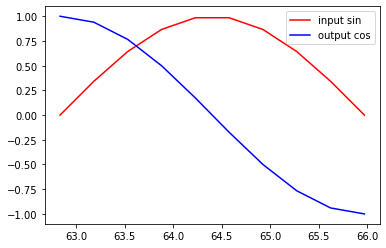

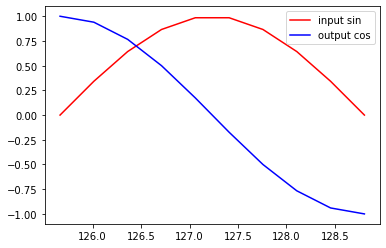

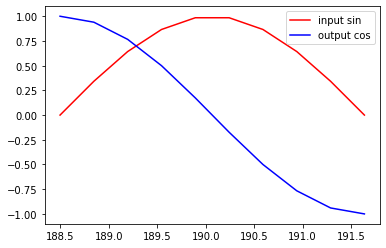

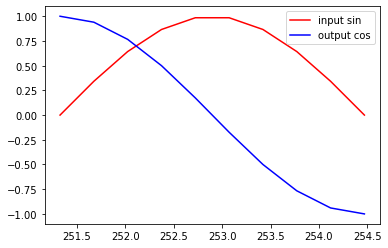

In [81]:
for i in range(100):
    start, end = math.pi * i, math.pi * (i+1)
    steps = torch.linspace(start, end, 10)
    x = torch.sin(steps)
    y = torch.cos(steps)

    if i % 20 == 0 or i == 0:
        
        plt.plot(steps, x, '-r', label="input sin")
        plt.plot(steps, y, '-b', label="output cos")
        plt.legend(loc="best")
        plt.show()


In [82]:
def inputs(i):
    start, end = math.pi * i, math.pi * (i+1)
    steps = torch.linspace(start, end, 10)
    x = torch.sin(steps)
    x = x[None, : , None]
    y = torch.cos(steps)
    y = y[None, : , None]
    return x, y

    

In [90]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        output, h_state = self.rnn(x, h_state)

        outs = [ self.out(output[:, i, :]) for i in range(output.size(1))]
        return torch.stack(outs, dim=1), h_state



In [91]:
rnn = Net()
print(rnn)

Net(
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (out): Linear(in_features=32, out_features=1, bias=True)
)


In [92]:
loss_fn = nn.MSELoss()
optim = torch.optim.Adam(rnn.parameters() ,lr=LR)
h_prev = None

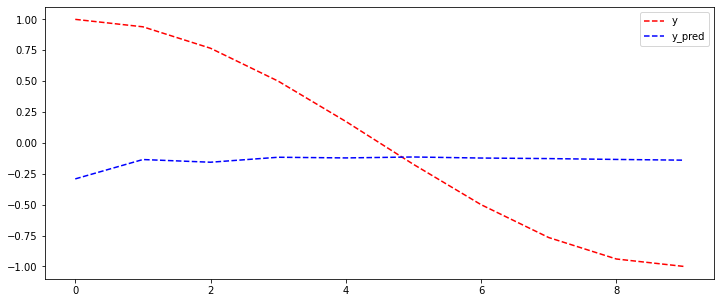

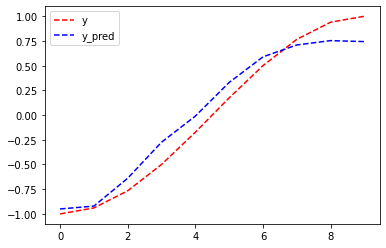

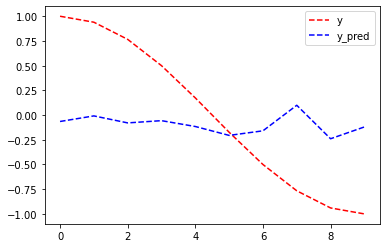

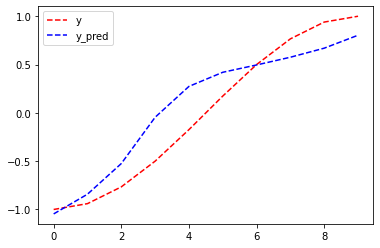

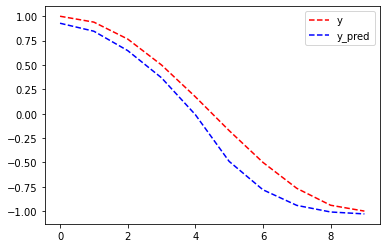

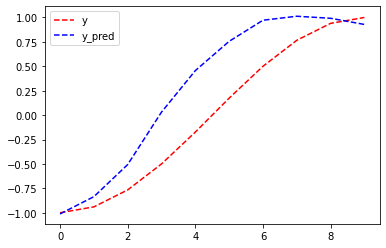

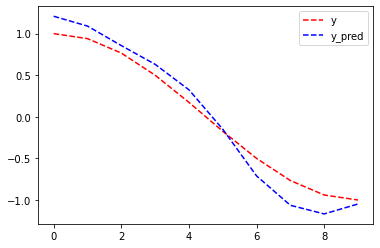

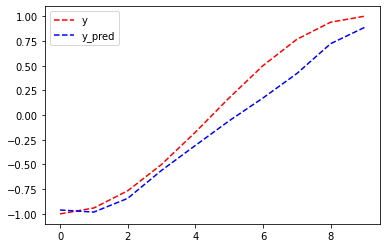

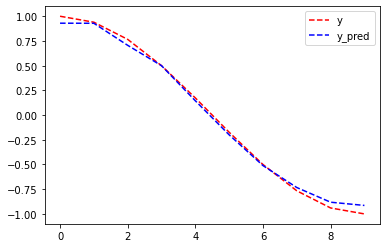

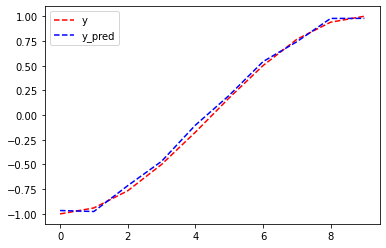

In [93]:
plt.figure(1, figsize=(12,5))
plt.ion()

for i in range(EPOCH):
    x, y = inputs(i)

    y_pred, h_state = rnn(x, h_prev)
    h_prev = h_state.data

    loss = loss_fn(y_pred, y)
    optim.zero_grad()
    loss.backward()
    optim.step()
    if i == 0 or i % 15 == 0:
        plt.plot(y.data.numpy().flatten(), 'r--', label="y")
        plt.plot(y_pred.data.numpy().flatten(), 'b--', label="y_pred")
        plt.legend(loc="best")
        plt.draw()
        plt.pause(0.5)
    
plt.ioff()
plt.show()
